## Définition du Problème
Le projet consiste à prédire le vainqueur de combats entre deux pokemons.

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Description des features						
<ul>
    <li>NUMERO: Numero</li>
    <li>NOM: Nom du Pokemon</li>
    <li>TYPE_1: Type primaire</li>
    <li>TYPE_2: Type Secondaire</li>
    <li>POINTS_DE_VIE: Point de vie</li>
    <li>POINTS_ATTAQUE: Niveau d'attaque</li>
    <li>POINTS_DEFFENCE: Niveau de defense</li>
    <li>POINTS_ATTAQUE_SPECIALE: Niveau d'attaque spéciale</li>
    <li>POINT_DEFENSE_SPECIALE: Niveau de spéciale spéciale</li>
    <li>POINTS_VITESSE: Vitesse</li>
    <li>NOMBRE_GENERATIONS : Numéro de la génération</li>
    <li>LEGENDAIRE: Le pokemon est il légendaire?</li>
</ul>

## Acquisition des données

In [9]:
#Récupération des fichiers necessaires au modèle.
import os

fileList = os.listdir("./datas")
for file in fileList:
    print(file)

combats.csv
dataset.csv
pokedex.csv
tests.csv


In [15]:
pokemons = pd.read_csv("./datas/pokedex.csv", encoding = "ISO-8859-1")

In [16]:
pokemons.head(10)

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,FAUX
5,6,Reptincel,Feu,NaN,58,64,58,80,65,80,1,FAUX
6,7,Dracaufeu,Feu,Vol,78,84,78,109,85,100,1,FAUX
7,8,Mega Dracaufeu X,Feu,Dragon,78,130,111,130,85,100,1,FAUX
8,9,Mega Dracaufeu Y,Feu,Vol,78,104,78,159,115,100,1,FAUX
9,10,Carapuce,Eau,NaN,44,48,65,50,64,43,1,FAUX


## Préparation et Nettoyage des données

In [17]:
pokemons.shape

(800, 12)

In [18]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
NUMERO                     800 non-null int64
NOM                        799 non-null object
TYPE_1                     800 non-null object
TYPE_2                     413 non-null object
POINTS_DE_VIE              800 non-null int64
POINTS_ATTAQUE             800 non-null int64
POINTS_DEFFENCE            800 non-null int64
POINTS_ATTAQUE_SPECIALE    800 non-null int64
POINT_DEFENSE_SPECIALE     800 non-null int64
POINTS_VITESSE             800 non-null int64
NOMBRE_GENERATIONS         800 non-null int64
LEGENDAIRE                 800 non-null object
dtypes: int64(8), object(4)
memory usage: 75.1+ KB


In [23]:
pokemons[pokemons['NOM'].isnull()]

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE


In [24]:
pokemons['NOM'][62]="Colossinge"

### Idenfication des features de catégorisation

In [27]:
cat_features = pokemons.select_dtypes(include=['object'])
cat_features.head()

,NOM,TYPE_1,TYPE_2,LEGENDAIRE
0,Bulbizarre,Herbe,Poison,FAUX
1,Herbizarre,Herbe,Poison,FAUX
2,Florizarre,Herbe,Poison,FAUX
3,Mega Florizarre,Herbe,Poison,FAUX
4,Salamèche,Feu,NaN,FAUX


Nous allons nous concentrer sur ces features à l'exception du **NOM**.

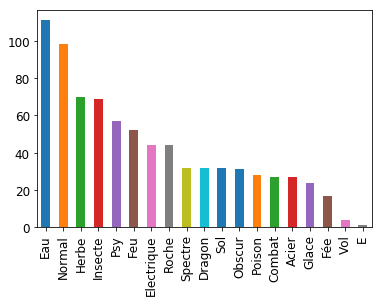

In [35]:
#Nombre de pokemons de type primaire 
#sns.catplot(x='TYPE_1',data=pokemons, kind='count', height=3, aspect=1.5)
pokemons.TYPE_1.value_counts().plot.bar()

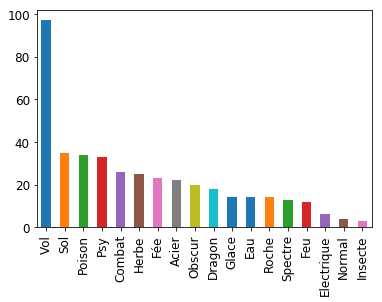

In [37]:
#Nombre de pokemons de type secondaire 
pokemons.TYPE_2.value_counts().plot.bar()LEGENDAIRE

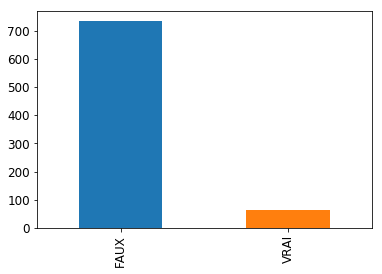

In [38]:
pokemons.LEGENDAIRE.value_counts().plot.bar()

In [39]:
#Transformation la feature de catégorisation LEGENDAIRE en donnée numerique 
pokemons['LEGENDAIRE'] = (pokemons['LEGENDAIRE']=="VRAI").astype(int)

## Acquisition des données de combats

In [41]:
combats = pd.read_csv(".datas/combats.csv", encoding = "ISO-8859-1")
combats.head()

,Premier_Pokemon,Second_Pokemon,Pokemon_Gagnant
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [42]:
combats.columns

Index(['Premier_Pokemon', 'Second_Pokemon', 'Pokemon_Gagnant'], dtype='object')

In [43]:
combats.shape

(50000, 3)

In [44]:
combats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
Premier_Pokemon    50000 non-null int64
Second_Pokemon     50000 non-null int64
Pokemon_Gagnant    50000 non-null int64
dtypes: int64(3)
memory usage: 1.1 MB


## Feature engineering

Nous allons déterminer le nombre de combats par Pokémon. Pour cela nous devons caluler le nombre d'apparitions en premier position et le nombre de fois en seconde position.

In [48]:
nbreCombatsPremierePosition = combats.groupby('Premier_Pokemon').count()
nbreCombatsPremierePosition.head(5)

,Second_Pokemon,Pokemon_Gagnant
Premier_Pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50


In [49]:
nbreCombatsSecondePosition = combats.groupby('Second_Pokemon').count()
nbreCombatsSecondePosition.head(5)

,Premier_Pokemon,Pokemon_Gagnant
Second_Pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62


In [50]:
nbreTotalCombatsParPokemon = nbreCombatsPremierePosition+nbreCombatsSecondePosition
nbreTotalCombatsParPokemon.head(8)

,Pokemon_Gagnant,Premier_Pokemon,Second_Pokemon
Premier_Pokemon,,,
1,133,NaN,NaN
2,121,NaN,NaN
3,132,NaN,NaN
4,125,NaN,NaN
5,112,NaN,NaN
6,118,NaN,NaN
7,133,NaN,NaN
8,139,NaN,NaN


In [51]:
#Nombre de combats gagnés
nbreCombatsGagnes = combats.groupby('Pokemon_Gagnant').count()
nbreCombatsGagnes.head(5)

,Premier_Pokemon,Second_Pokemon
Pokemon_Gagnant,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55


In [52]:
nbreCombatsGagnes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783 entries, 1 to 800
Data columns (total 2 columns):
Premier_Pokemon    783 non-null int64
Second_Pokemon     783 non-null int64
dtypes: int64(2)
memory usage: 18.4 KB


In [53]:
listePokemons = combats.groupby('Pokemon_Gagnant').count()
listePokemons.sort_index()
listePokemons['NBRE_COMBATS'] = nbreTotalCombatsParPokemon.Pokemon_Gagnant
listePokemons['NBRE_VICTOIRES'] = nbreCombatsGagnes.Premier_Pokemon
listePokemons['POURCENTAGE_VICTOIRES'] = nbreCombatsGagnes.Premier_Pokemon/nbreTotalCombatsParPokemon.Pokemon_Gagnant
listePokemons.head(5)

,Premier_Pokemon,Second_Pokemon,NBRE_COMBATS,NBRE_VICTOIRES,POURCENTAGE_VICTOIRES
Pokemon_Gagnant,,,,,
1,37,37,133,37,0.278195
2,46,46,121,46,0.380165
3,89,89,132,89,0.674242
4,70,70,125,70,0.560000
5,55,55,112,55,0.491071


In [54]:
#Agrregate both dataframe to have global view into data
nouveauPokedex = pokemons.merge(listePokemons,left_on='NUMERO', right_index=True, how='left')
nouveauPokedex.head(5)

,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Premier_Pokemon,Second_Pokemon,NBRE_COMBATS,NBRE_VICTOIRES,POURCENTAGE_VICTOIRES
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,55.0,55.0,112.0,55.0,0.491071


In [55]:
#Phase d'apprentissage
#Decoupage des observations en jeu d'apprentissage et jeu de test
nouveauPokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
NUMERO                     800 non-null int64
NOM                        800 non-null object
TYPE_1                     800 non-null object
TYPE_2                     413 non-null object
POINTS_DE_VIE              800 non-null int64
POINTS_ATTAQUE             800 non-null int64
POINTS_DEFFENCE            800 non-null int64
POINTS_ATTAQUE_SPECIALE    800 non-null int64
POINT_DEFENSE_SPECIALE     800 non-null int64
POINTS_VITESSE             800 non-null int64
NOMBRE_GENERATIONS         800 non-null int64
LEGENDAIRE                 800 non-null int32
Premier_Pokemon            783 non-null float64
Second_Pokemon             783 non-null float64
NBRE_COMBATS               783 non-null float64
NBRE_VICTOIRES             783 non-null float64
POURCENTAGE_VICTOIRES      783 non-null float64
dtypes: float64(5), int32(1), int64(8), object(3)
memory usage: 103.2+ KB


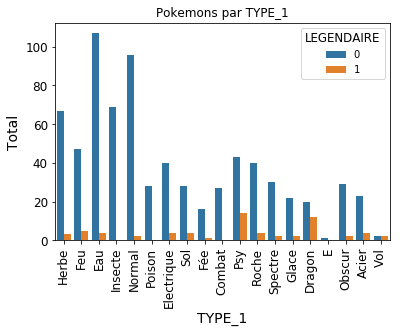

In [56]:
#What Pokemons Type should trainer have?
#For TYPE_1
axe_X = sns.countplot(x='TYPE_1', hue='LEGENDAIRE', data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_1')
plt.ylabel('Total')
plt.title('Pokemons par TYPE_1')
plt.show()

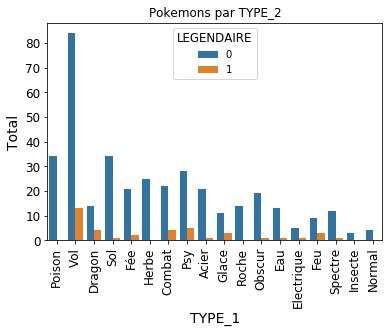

In [57]:
#What Pokemons Type should trainer have?
#For TYPE_2
axe_X = sns.countplot(x='TYPE_2', hue='LEGENDAIRE', data=nouveauPokedex)
plt.xticks(rotation=90)
plt.xlabel('TYPE_1')
plt.ylabel('Total')
plt.title('Pokemons par TYPE_2')
plt.show()

In [58]:
nouveauPokedex.describe()

,NUMERO,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Premier_Pokemon,Second_Pokemon,NBRE_COMBATS,NBRE_VICTOIRES,POURCENTAGE_VICTOIRES
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,63.856960,63.856960,127.541507,63.856960,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,32.925941,32.925941,11.397402,32.925941,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,3.000000,3.000000,92.000000,3.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,36.000000,36.000000,120.000000,36.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,62.000000,62.000000,128.000000,62.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,91.000000,91.000000,135.000000,91.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,152.000000,152.000000,164.000000,152.000000,0.984496


In [59]:
#What Pokemons Type have the great winning percentage?
nouveauPokedex.groupby('TYPE_1').agg({'POURCENTAGE_VICTOIRES':'mean'}).sort_values(by='POURCENTAGE_VICTOIRES')

,POURCENTAGE_VICTOIRES
TYPE_1,
Fée,0.329300
E,0.343750
Roche,0.404852
Acier,0.424529
Poison,0.433262
Insecte,0.439006
Glace,0.439604
Herbe,0.440364
Eau,0.470520


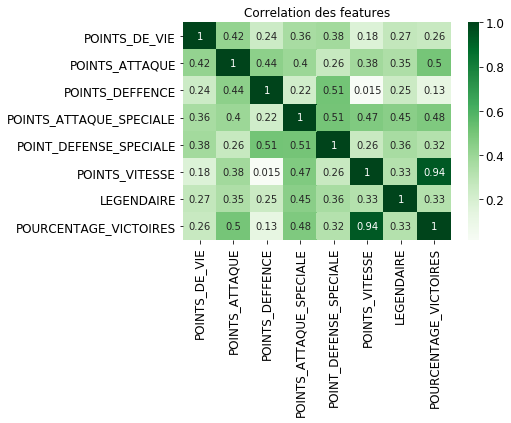

In [60]:
#Correlation entre les données
corr = nouveauPokedex.loc[:,['TYPE_1','POINTS_DE_VIE','POINTS_ATTAQUE','POINTS_DEFFENCE','POINTS_ATTAQUE_SPECIALE',
                             'POINT_DEFENSE_SPECIALE','POINTS_VITESSE','LEGENDAIRE','POURCENTAGE_VICTOIRES']].corr()
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Correlation des features')
plt.show()


In [61]:
#Sauvegarde du nouveau dataset Pokedex
dataset = nouveauPokedex
dataset.to_csv("C:/Users/Andreas/PycharmProjects/Pokemon/datas/dataset.csv", encoding = "ISO-8859-1", sep='\t')

In [62]:
dataset = pd.read_csv("C:/Users/Andreas/PycharmProjects/Pokemon/datas/dataset.csv", encoding = "ISO-8859-1", delimiter='\t')

In [63]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 18 columns):
Unnamed: 0                 800 non-null int64
NUMERO                     800 non-null int64
NOM                        800 non-null object
TYPE_1                     800 non-null object
TYPE_2                     413 non-null object
POINTS_DE_VIE              800 non-null int64
POINTS_ATTAQUE             800 non-null int64
POINTS_DEFFENCE            800 non-null int64
POINTS_ATTAQUE_SPECIALE    800 non-null int64
POINT_DEFENSE_SPECIALE     800 non-null int64
POINTS_VITESSE             800 non-null int64
NOMBRE_GENERATIONS         800 non-null int64
LEGENDAIRE                 800 non-null int64
Premier_Pokemon            783 non-null float64
Second_Pokemon             783 non-null float64
NBRE_COMBATS               783 non-null float64
NBRE_VICTOIRES             783 non-null float64
POURCENTAGE_VICTOIRES      783 non-null float64
dtypes: float64(5), int64(10), object(3)
memory usage:

In [64]:
dataset.shape

(800, 18)

In [65]:
dataset.head(5)

,Unnamed: 0,NUMERO,NOM,TYPE_1,TYPE_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDAIRE,Premier_Pokemon,Second_Pokemon,NBRE_COMBATS,NBRE_VICTOIRES,POURCENTAGE_VICTOIRES
0,0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
4,4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,55.0,55.0,112.0,55.0,0.491071


In [66]:
#Supprimer toutes les lignes ayant des valeurs manquantes
dataset = dataset.dropna(axis=0, how ='any')

In [67]:
# Extraction des valeurs explicatives
X = dataset.iloc[:, 5:12].values
#Extraction de la valeur expliquée
Y = dataset.iloc[:, 17].values 

# Construction du jeu d'entrainement et du jeu de test


In [68]:
 X_APPRENTISSAGE,  X_VALIDATION,  Y_APPRENTISSAGE,  Y_VALIDATION = train_test_split(X, Y, test_size=0.2, random_state= 0)
Y_VALIDATION.shape

(81,)

## Phase d'apprentissage
Il s'agit d'un problème de regression. Nous allons utiliser les algorithmes suivants
<ul>
    <li>Regression Lineaire</li>
    <li>Arbre de decision</li>
    <li>Forêt aléatoire</li>
</ul>

In [69]:
#Modèle d'apprentissage

#Algorithme de regression Lineaire
algorithme = LinearRegression()
#Apprentissage de l'algorithme avec des jeux de données d'apprentissage
algorithme.fit(X_APPRENTISSAGE, Y_APPRENTISSAGE)
#Realisation des predictions avec notre jeu de test
predictions = algorithme.predict(X_VALIDATION)
#Calcul de la precision de notre algorithme
precision = r2_score(Y_VALIDATION, predictions)
precision


0.9043488485570963

In [70]:

#Algorithme d'abre de decisions.
algorithme = DecisionTreeRegressor()
#Apprentissage de l'algorithme avec des jeux de données d'apprentissage
algorithme.fit(X_APPRENTISSAGE, Y_APPRENTISSAGE)
#Realisation des predictions avec notre jeu de test
predictions = algorithme.predict(X_VALIDATION)
#Calcul de la precision de notre algorithme
precision = r2_score(Y_VALIDATION, predictions)
precision


0.8804268730938482

In [72]:
#Algorithme de Forêt aléatoire.
algorithme = RandomForestRegressor()
#Apprentissage de l'algorithme avec des jeux de données d'apprentissage
algorithme.fit(X_APPRENTISSAGE, Y_APPRENTISSAGE)
#Realisation des predictions avec notre jeu de test
predictions = algorithme.predict(X_VALIDATION)
#Calcul de la precision de notre algorithme
precision = r2_score(Y_VALIDATION, predictions)

#Sauvegarde du modèle d'apprentissage dans un fichier car il presente la plus grande precision.
file = './modele/modele_pokemon.mod'
joblib.dump(algorithme, file)

precision

0.9334217184759959

In [73]:
# Fonction qui recherche les informations en fonction du numero du Pokemon dans le Pokedex

def rechercheInformationPokemon(numeroPokemon, pokedex):
    infosPokemon = []
    for pokemon in pokedex:
        if ( numeroPokemon == int(pokemon[0]) ):
            infosPokemon = pokemon[1], pokemon[4], pokemon[5], pokemon[6], pokemon[7], pokemon[8], pokemon[9], pokemon[10]
            break
    return infosPokemon
            
# Fonction de prediction 
def prediction(numeroPokemon1, numeroPokemon2, Pokedex):
    pokemon_1 = rechercheInformationPokemon(numeroPokemon1,Pokedex)
    pokemon_2 = rechercheInformationPokemon(numeroPokemon2,Pokedex)
            
    # Chargement du modele d'apprentissage dans l'algorithme       
    modele_prediction = joblib.load('C:/Users/Andreas/PycharmProjects/Pokemon/modele/modele_pokemon.mod')
    prediction_pokemon_1 = modele_prediction.predict([[pokemon_1[1], pokemon_1[2], pokemon_1[3], pokemon_1[4], pokemon_1[5],
                           pokemon_1[6], pokemon_1[7]]])
    prediction_pokemon_2 = modele_prediction.predict([[pokemon_2[1], pokemon_2[2], pokemon_2[3], pokemon_2[4], pokemon_2[5],
                           pokemon_2[6], pokemon_2[7]]])
     
    print('COMBAT OPPOSANT ' + str(pokemon_1[0]) +' A ' + str(pokemon_2[0]))
    print('----------Prediction des Pokemons--------')
    print( str(pokemon_1[0]) + " " +str(prediction_pokemon_1) )
    print( str(pokemon_2[0]) + " " +str(prediction_pokemon_2) )
            
    if prediction_pokemon_1 > prediction_pokemon_2:
        print( str(pokemon_1[0]) +' est vainqueur')
    else:
        print( str(pokemon_2[0]) +' est vainqueur')

with open("./datas/pokedex.csv", newline='') as csvfile:
    pokedex=csv.reader(csvfile)
    next(pokedex)
    prediction(368, 598, pokedex); 
    

COMBAT OPPOSANT Mangriff A Crapustule
----------Prediction des Pokemons--------
Mangriff [0.70453906]
Crapustule [0.56317528]
Mangriff est vainqueur
